In [ ]:
import numpy as np
import argparse
import csv
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

import pandas as pd
import plotly as pl
import plotly.graph_objs as go
import seaborn as sns

from typing import  Tuple, Dict, List

**BIRCH Clustering**

In [ ]:
def load_data(file_name) -> List[List]:
	print("--->Loading csv file")

	with open(file_name) as csv_file:
		csv_reader = csv.reader(csv_file, delimiter=",")
		line_count = 0
		data = []

		for line in csv_reader:
			if line_count == 0:
				print(f'Column names: [{", ".join(line)}]')
			else:
				data.append(line)
			line_count += 1

	print(f'Loaded {line_count} records')
	return data

In [ ]:
def compute_clusters(data: List) -> np.ndarray:
	print("--->Computing clusters")
	birch = Birch(
		branching_factor=50,
		n_clusters=5,
		threshold=0.3,
		copy=True,
		compute_labels=True
	)

	birch.fit(data)
	predictions = np.array(birch.predict(data))
	return predictions

In [ ]:
def show_results(data: np.ndarray, labels: np.ndarray, plot_handler = "seaborn") -> None:
	labels = np.reshape(labels, (1, labels.size))
	data = np.concatenate((data, labels.T), axis=1)

	# Seaborn plot
	if plot_handler == "seaborn":
		facet = sns.lmplot(
			data=pd.DataFrame(data, columns=["Income", "Spending", "Label"]),
			x="Income",
			y="Spending",
			hue='Label',
			fit_reg=False,
			legend=True,
			legend_out=True
		)

	# Pure matplotlib plot
	if plot_handler == "matplotlib":
		fig = plt.figure()
		ax = fig.add_subplot(111)
		scatter = ax.scatter(data[:,0], data[:, 1], c=data[:, 2], s=50)
		ax.set_title("Clusters")
		ax.set_xlabel("Income")
		ax.set_ylabel("Spending")
		plt.colorbar(scatter)
	plt.show()

In [ ]:
def show_data_corelation(data=None, csv_file_name=None):
	data_set = None
	if csv_file_name is None:
		cor = np.corrcoef(data)
		print("Corelation matrix:")
		print(cor)
	else:
		data_set = pd.read_csv(csv_file_name)
		print(data_set.describe())
		data_set = data_set[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
		cor = data_set.corr()
	sns.heatmap(cor, square=True)
	plt.show()
	return data_set

--->Loading csv file
Column names: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Loaded 201 records
--->Computing clusters


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


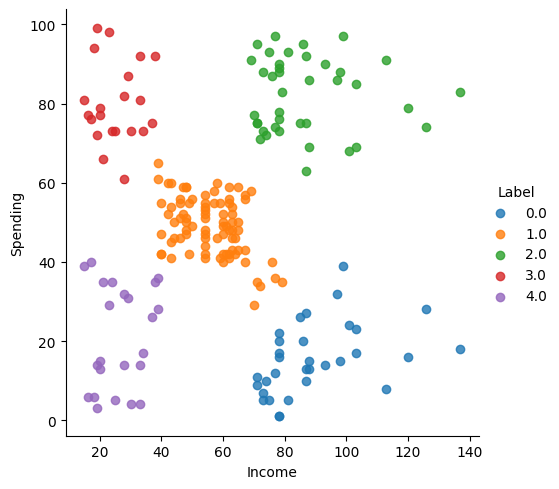

In [ ]:
def main(args) -> None:
	data = load_data(args.data_file)
	filtered_data = np.array([[item[3], item[4]] for item in data])

	data_set = None #Alternative data loaded using pandas
	if args.describe == True:
		data_set = show_data_corelation(csv_file_name=args.data_file)

	filtered_data = np.array(filtered_data).astype(np.float64)
	labels = compute_clusters(filtered_data)
	show_results(filtered_data, labels, args.plot_handler)


if __name__ == "__main__":
	parser = argparse.ArgumentParser(description="Do some clustering")
	parser.add_argument("--data-file", type=str, default="/content/Mall_Customers.csv", help="dataset file name")
	parser.add_argument("--describe", type=bool, default=False, help="describe the dataset")
	parser.add_argument("--plot-handler", type=str, default="seaborn", help="what library to use for data visualisation")
args, unknown = parser.parse_known_args()
main(args)

In [ ]:
from sklearn.cluster import KMeans, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Load and preprocess data
data = load_data("/content/Mall_Customers.csv")
filtered_data = np.array([[item[3], item[4]] for item in data])
filtered_data = np.array(filtered_data).astype(np.float64)

# Cluster using KMeans algorithm
kmeans = KMeans(n_clusters=5)
kmeans.fit(filtered_data)
kmeans_labels = kmeans.labels_

# Compute Silhouette Score and Calinski-Harabasz Index for KMeans
kmeans_silhouette = silhouette_score(filtered_data, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(filtered_data, kmeans_labels)

# Cluster using BIRCH algorithm
birch = Birch(n_clusters=5)
birch.fit(filtered_data)
birch_labels = birch.labels_

# Compute Silhouette Score and Calinski-Harabasz Index for BIRCH
birch_silhouette = silhouette_score(filtered_data, birch_labels)
birch_calinski_harabasz = calinski_harabasz_score(filtered_data, birch_labels)

print("KMeans Silhouette Score:", kmeans_silhouette)
print("KMeans Calinski-Harabasz Index:", kmeans_calinski_harabasz)
print("BIRCH Silhouette Score:", birch_silhouette)
print("BIRCH Calinski-Harabasz Index:", birch_calinski_harabasz)


--->Loading csv file
Column names: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Loaded 201 records
KMeans Silhouette Score: 0.553931997444648
KMeans Calinski-Harabasz Index: 247.35899338037282
BIRCH Silhouette Score: 0.5419687641328385
BIRCH Calinski-Harabasz Index: 240.60312028288482


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]
X = (X - X.mean()) / X.std()

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score

brc = Birch(n_clusters=5)
brc.fit(X)

labels = brc.predict(X)
silhouette = silhouette_score(X, labels)
db = davies_bouldin_score(X, labels)

print(f'Silhouette score: {silhouette:.3f}')
print(f'Davies-Bouldin score: {db:.3f}')


Silhouette score: 0.416
Davies-Bouldin score: 0.697
